**Setting**

In [ ]:
import os
import random
import numpy as np
import pandas as pd

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)

seed_everything(42)

**Data**

In [ ]:
df = pd.read_csv('mushroom_cleaned.csv')

**Random Forest**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
file = files.upload()
for fn in file.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name = fn, length = len(file[fn])))

Saving mushroom_cleaned.csv to mushroom_cleaned.csv
User uploaded file "mushroom_cleaned.csv" with length 3171031 bytes


In [ ]:
data = pd.read_csv(io.StringIO(file['mushroom_cleaned.csv'].decode('utf-8')))

# Separate features and target
X = data.drop(columns=["class"])  # "class" is the target column
y = data["class"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Results\n")
#print("Accuracy:", accuracy_score(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Extract feature importances and corresponding feature names
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Sort the feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Display the feature importances
print("Feature Importances")
for name, importance in zip(sorted_feature_names, sorted_importances):
    print(f"{name}: {importance:.4f}")

NameError: name 'file' is not defined

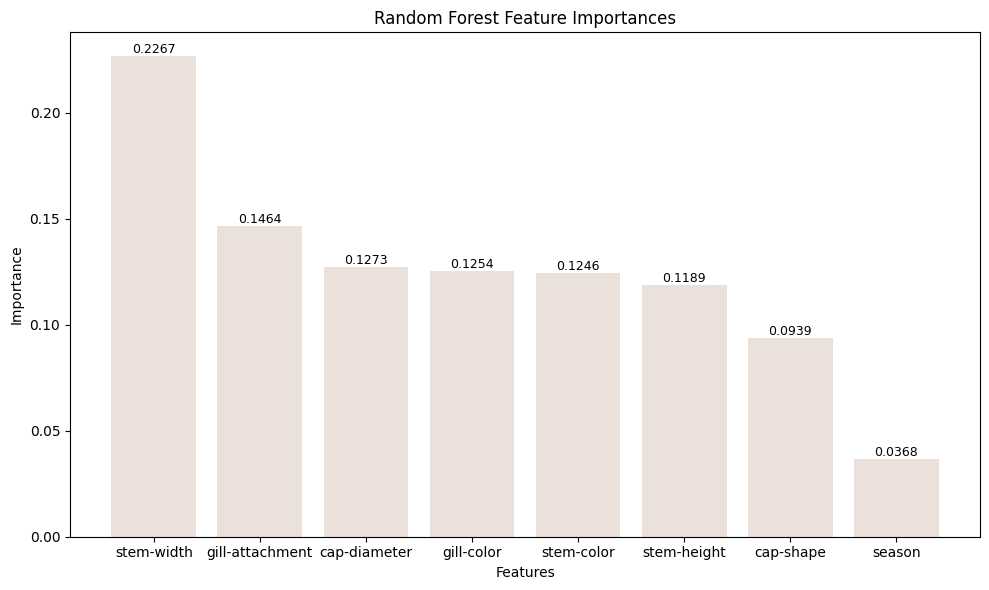

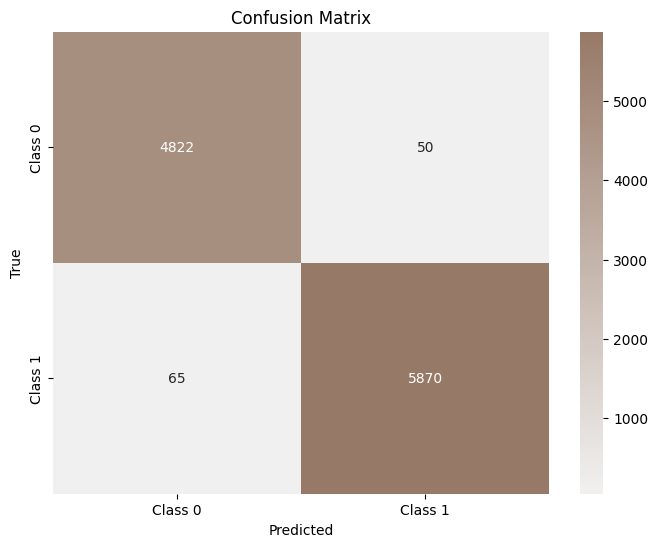

In [ ]:
# Plot feature importances with numbers
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_feature_names, sorted_importances, color="#EBE0DA")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
#plt.xticks(rotation=90)

# Annotate the bars with values
for bar, importance in zip(bars, sorted_importances):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{importance:.4f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Visualize the confusion matrix with specified color
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=sns.light_palette("#977967", as_cmap=True), xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
pip install shap --upgrade

In [ ]:
import shap
import matplotlib.pyplot as plt

# SHAP analysis using TreeExplainer with additivity check disabled

# Ensure column order is preserved
X_test = X_test[X_train.columns]

explainer = shap.Explainer(rf_model, X_train, check_additivity=False)
shap_values = explainer(X_test)

# Plot SHAP summary plot
plt.figure()
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Plot SHAP beeswarm plot
plt.figure()
shap.summary_plot(shap_values, X_test)

# Visualize a single instance's SHAP explanation (force plot for one example)
instance_index = 0  # Choose an index of a mushroom in X_test
shap.force_plot(explainer.expected_value[1], shap_values[instance_index].values,
                X_test.iloc[instance_index], matplotlib=True)

TypeError: TreeExplainer.__init__() got an unexpected keyword argument 'check_additivity'

**LGBM**

In [ ]:
from google.colab import files
import pandas as pd
import io  # Ensure 'io' module is imported

# Upload the file
print("Upload your dataset...")
uploaded_file = files.upload()

# Process the uploaded file
for fn in uploaded_file.keys():  # Use 'fn' instead of 'file_name'
    print(f'User uploaded file "{fn}" with length {len(uploaded_file[fn])} bytes')
    # Read the CSV file into a DataFrame
    data = pd.read_csv(io.StringIO(uploaded_file[fn].decode('utf-8')))

# Display the first few rows to confirm the dataset loaded correctly
print("First few rows of the dataset:")
print(data.head())


Upload your dataset...


Saving mushroom_cleaned.csv to mushroom_cleaned.csv
User uploaded file "mushroom_cleaned.csv" with length 3171031 bytes
First few rows of the dataset:
   cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0          1372          2                2          10     3.807467   
1          1461          2                2          10     3.807467   
2          1371          2                2          10     3.612496   
3          1261          6                2          10     3.787572   
4          1305          6                2          10     3.711971   

   stem-width  stem-color    season  class  
0        1545          11  1.804273      1  
1        1557          11  1.804273      1  
2        1566          11  1.804273      1  
3        1566          11  1.804273      1  
4        1464          11  0.943195      1  


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb

# Load the dataset
file_path = 'mushroom_cleaned (1).csv'
data = pd.read_csv(file_path)

# Separate features and target
X = data.drop(columns=['class'])  # Assuming 'class' is the target column
y = data['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create LGBM Dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Define model parameters
params = {
    'objective': 'binary',          # Use 'multiclass' for multi-class problems
    'metric': 'binary_error',       # Use 'multi_logloss' for multi-class problems
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'seed': 42
}

# Train the LightGBM model
lgbm_model = lgb.train(
    params,
    train_data,
    num_boost_round=100,
    valid_sets=[train_data, test_data],
    valid_names=['train', 'valid'],
)

# Make predictions
y_pred = lgbm_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # For binary classification

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_binary))
print("\nClassification Report:\n", classification_report(y_test, y_pred_binary))


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 23777, number of negative: 19451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.041829 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 43228, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550037 -> initscore=0.200820
[LightGBM] [Info] Start training from score 0.200820
Accuracy: 0.9773295086517998

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      4909
           1       0.98      0.98      0.98      5898

    accuracy                           0.98     10807
   macro avg       0.98      0.98      0.98     10807
weighted avg       0.98      0.98      0.98     10807



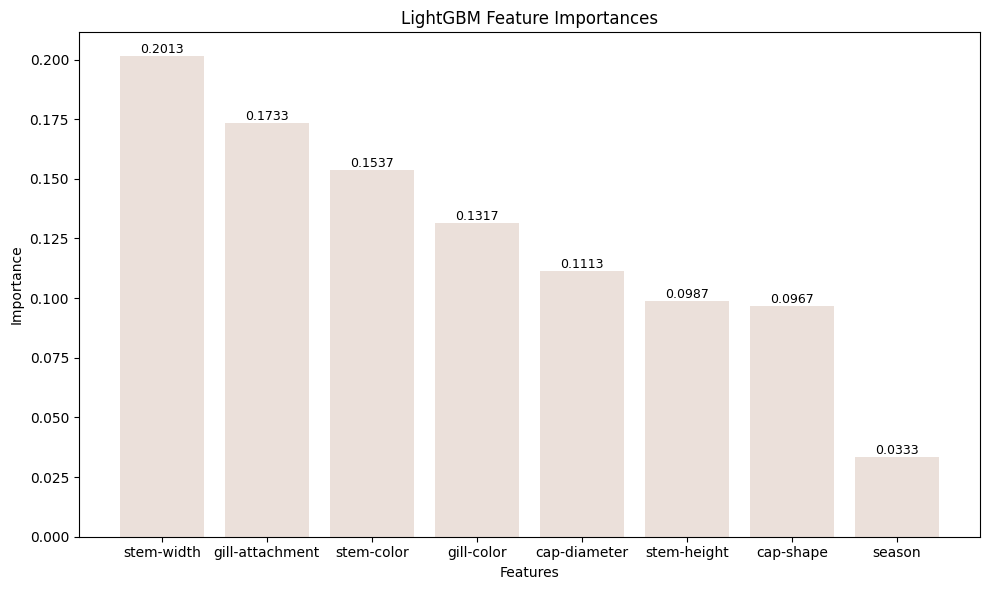

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importance and names from the model
importance = lgbm_model.feature_importance()
feature_names = lgbm_model.feature_name()

# Combine and sort features by importance
sorted_indices = np.argsort(importance)[::-1]  # Sort in descending order
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_importances = [importance[i] for i in sorted_indices]

# Normalize the importance values
total_importance = sum(sorted_importances)
normalized_importances = [v / total_importance for v in sorted_importances]

# Plot feature importances
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_feature_names, normalized_importances, color="#EBE0DA")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('LightGBM Feature Importances')

# Annotate the bars with normalized values
for bar, importance in zip(bars, normalized_importances):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f"{importance:.4f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

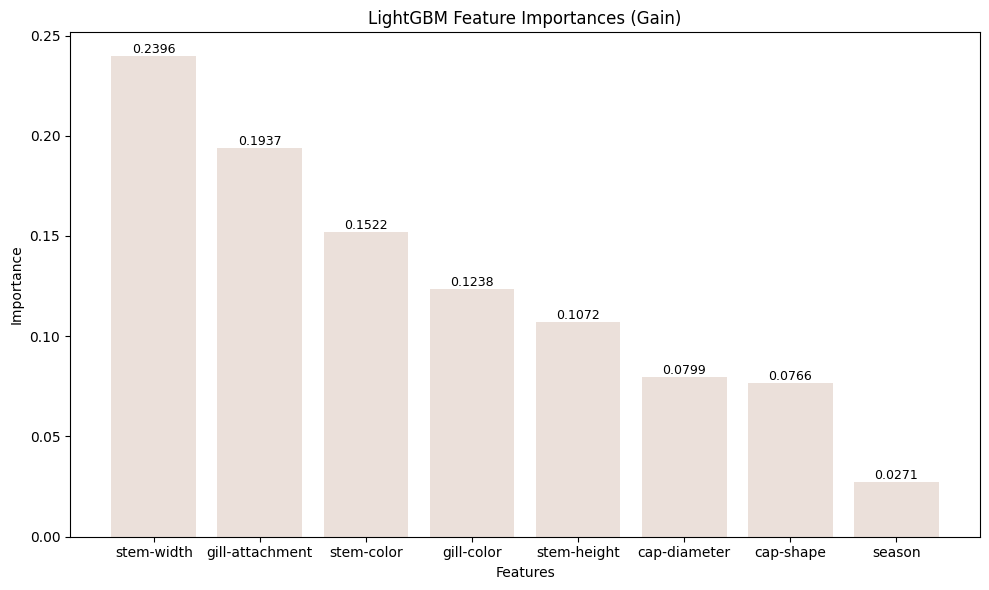

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importance and names from the model
importance = lgbm_model.feature_importance(importance_type="gain")
feature_names = lgbm_model.feature_name()

# Combine and sort features by importance
sorted_indices = np.argsort(importance)[::-1]  # Sort in descending order
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_importances = [importance[i] for i in sorted_indices]

# Normalize the importance values
total_importance = sum(sorted_importances)
normalized_importances = [v / total_importance for v in sorted_importances]

# Plot feature importances
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_feature_names, normalized_importances, color="#EBE0DA")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('LightGBM Feature Importances (Gain)')

# Annotate the bars with normalized values
for bar, importance in zip(bars, normalized_importances):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f"{importance:.4f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

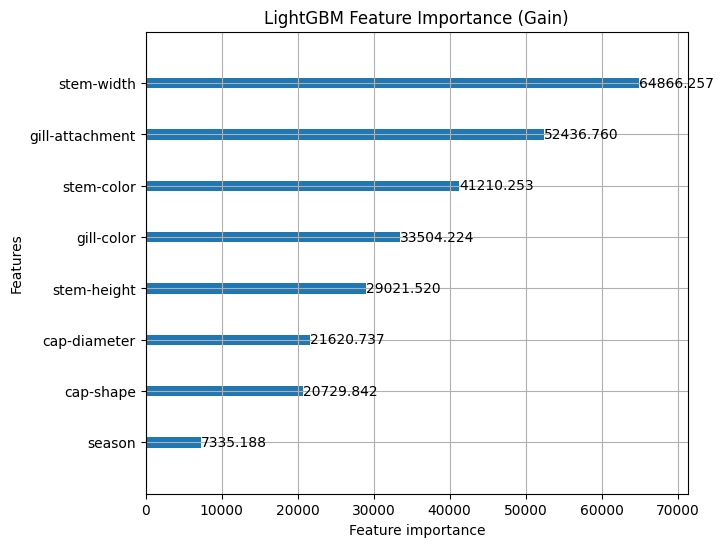

In [ ]:
lgb.plot_importance(lgbm_model, importance_type="gain", figsize=(7,6), title="LightGBM Feature Importance (Gain)")
plt.show()

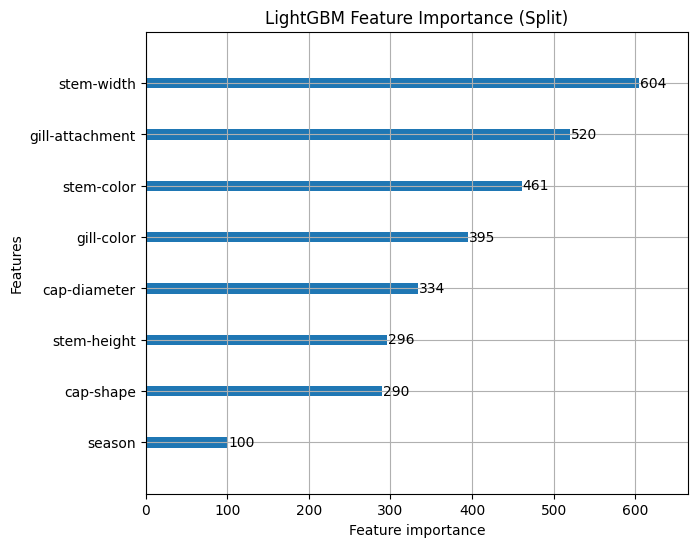

In [ ]:
lgb.plot_importance(lgbm_model, importance_type="split", figsize=(7,6), title="LightGBM Feature Importance (Split)")
plt.show()

 99%|===================| 43011/43228 [03:01<00:00]       

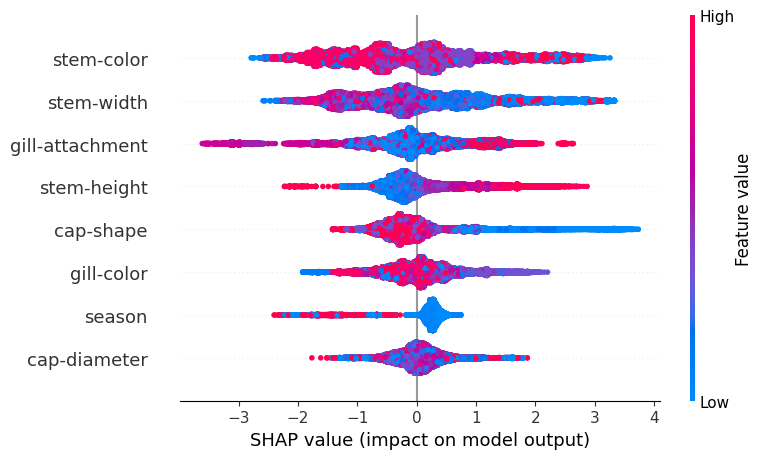

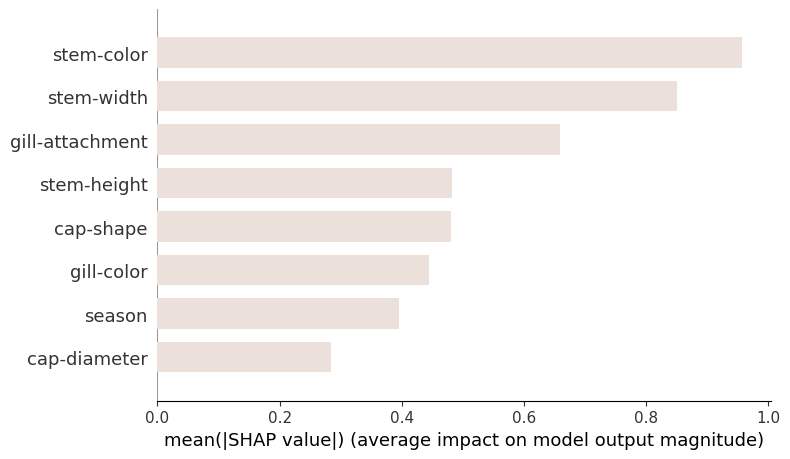

In [ ]:
import shap
import matplotlib.pyplot as plt

# Initialize SHAP explainer
explainer = shap.Explainer(lgbm_model, X_train)

# Calculate SHAP values
shap_values = explainer(X_train)

# Summary plot for global feature importance
shap.summary_plot(shap_values, X_train)

# Bar plot for global feature importance
shap.summary_plot(shap_values, X_train, plot_type='bar', color="#EBE0DA")

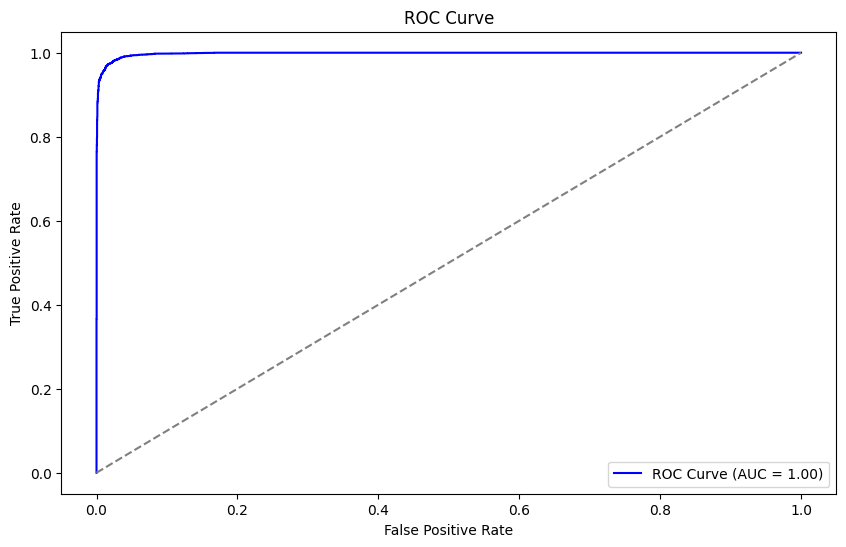

In [ ]:
from sklearn.metrics import roc_curve, auc

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random prediction
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

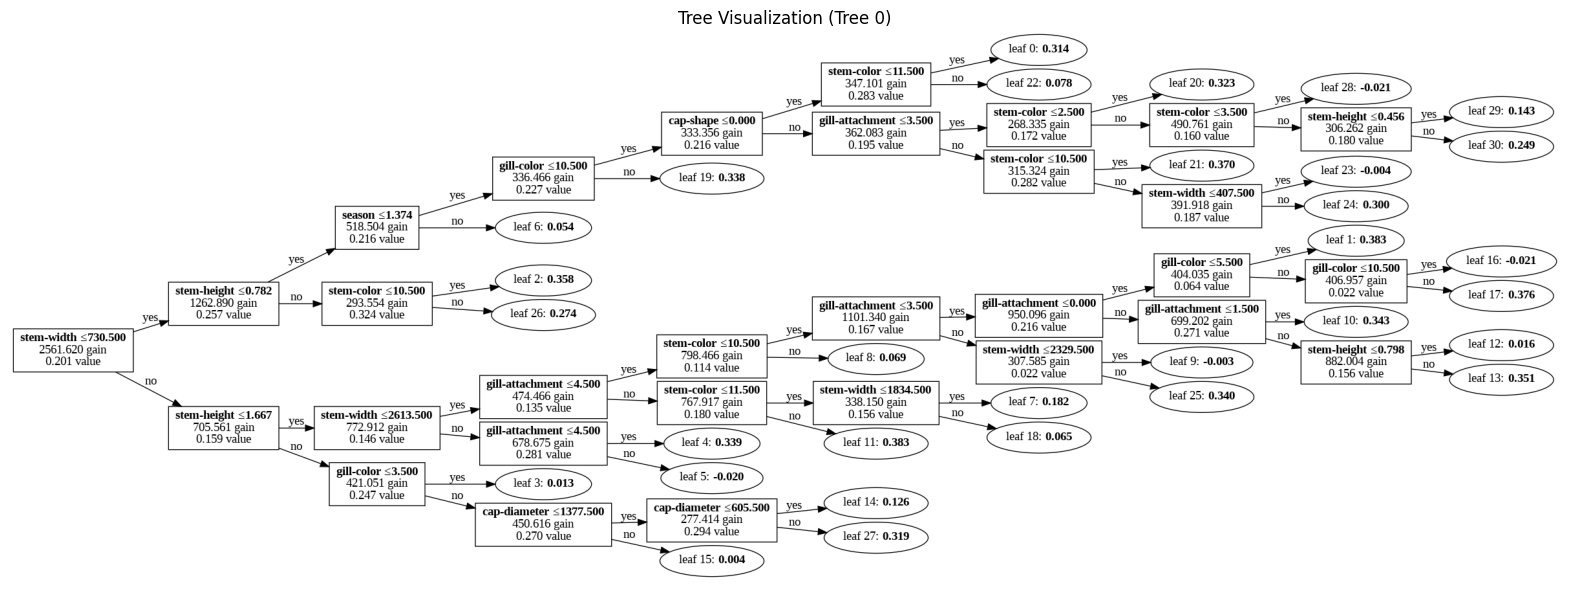

In [ ]:

lgb.plot_tree(lgbm_model, tree_index=0, figsize=(20, 10), show_info=['split_gain', 'internal_value'])
plt.title("Tree Visualization (Tree 0)")
plt.show()


In [ ]:
# Extract feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': lgbm_model.feature_importance(importance_type='gain')
}).sort_values(by='Importance', ascending=False)

# Display less important features
print("Less important features:")
print(feature_importance.tail())


Less important features:
        Feature    Importance
3    gill-color  33504.224147
4   stem-height  29021.519644
0  cap-diameter  21620.736645
1     cap-shape  20729.842349
7        season   7335.187694


In [ ]:
X_reduced = X.drop(columns=['season'])  # Drop 'season'
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Create LGBM Dataset
train_data_reduced = lgb.Dataset(X_train_reduced, label=y_train)
test_data_reduced = lgb.Dataset(X_test_reduced, label=y_test, reference=train_data_reduced)
# Retrain the model
model_reduced = lgb.train(
    params,
    train_data_reduced,
    num_boost_round=100,
    valid_sets=[train_data_reduced, test_data_reduced],
    valid_names=['train', 'valid']
)


[LightGBM] [Info] Number of positive: 23777, number of negative: 19451
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 804
[LightGBM] [Info] Number of data points in the train set: 43228, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550037 -> initscore=0.200820
[LightGBM] [Info] Start training from score 0.200820


In [ ]:
# Predict and evaluate the reduced model
y_pred_reduced = model_reduced.predict(X_test_reduced)
y_pred_binary_reduced = (y_pred_reduced > 0.5).astype(int)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy (Reduced Model):", accuracy_score(y_test, y_pred_binary_reduced))
print("\nClassification Report (Reduced Model):\n", classification_report(y_test, y_pred_binary_reduced))


Accuracy (Reduced Model): 0.979920421948737

Classification Report (Reduced Model):
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      4909
           1       0.99      0.98      0.98      5898

    accuracy                           0.98     10807
   macro avg       0.98      0.98      0.98     10807
weighted avg       0.98      0.98      0.98     10807



**xgboost**

In [ ]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'max_depth': 5,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

num_round = 1500  # Number of boosting rounds
bst = xgb.train(params, dtrain, num_round)

preds = bst.predict(dtest)
predictions = [1 if value > 0.5 else 0 for value in preds]
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')
print("\nClassification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.9904691403719811

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4909
           1       0.99      0.99      0.99      5898

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807



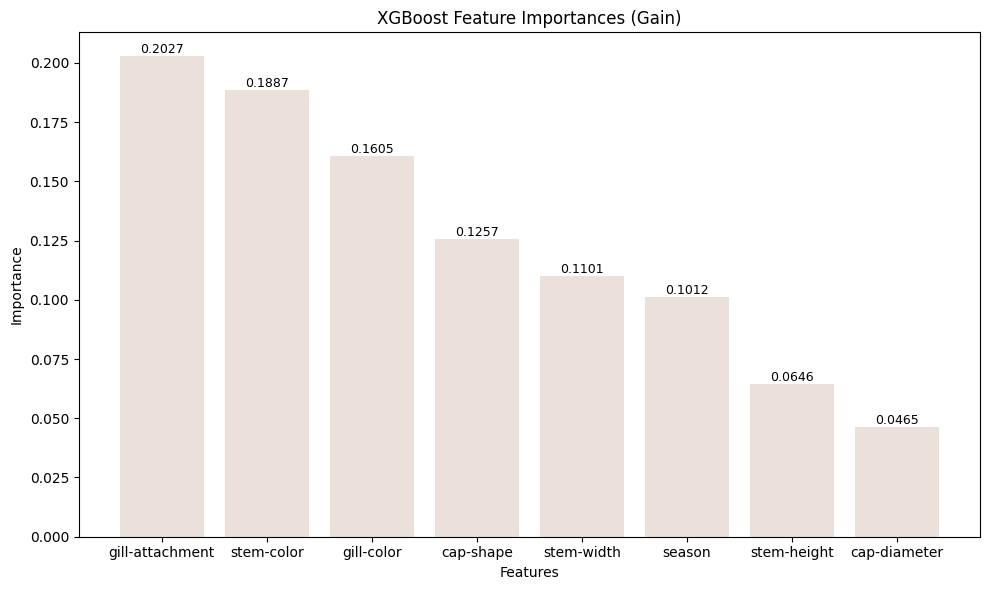

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb
import numpy as np

# Extract feature importances
importance_dict = bst.get_score(importance_type='gain')
features = list(importance_dict.keys())
importances = list(importance_dict.values())

# Normalize importances
total_importance = sum(importances)
normalized_importances = [imp / total_importance for imp in importances]

# Sort features by normalized importance
sorted_indices = np.argsort(normalized_importances)[::-1]
sorted_features = [features[i] for i in sorted_indices]
sorted_importances = [normalized_importances[i] for i in sorted_indices]

# Plot normalized feature importances
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_features, sorted_importances, color="#EBE0DA")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('XGBoost Feature Importances (Gain)')

# Annotate the bars with values
for bar, importance in zip(bars, sorted_importances):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{importance:.4f}",
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


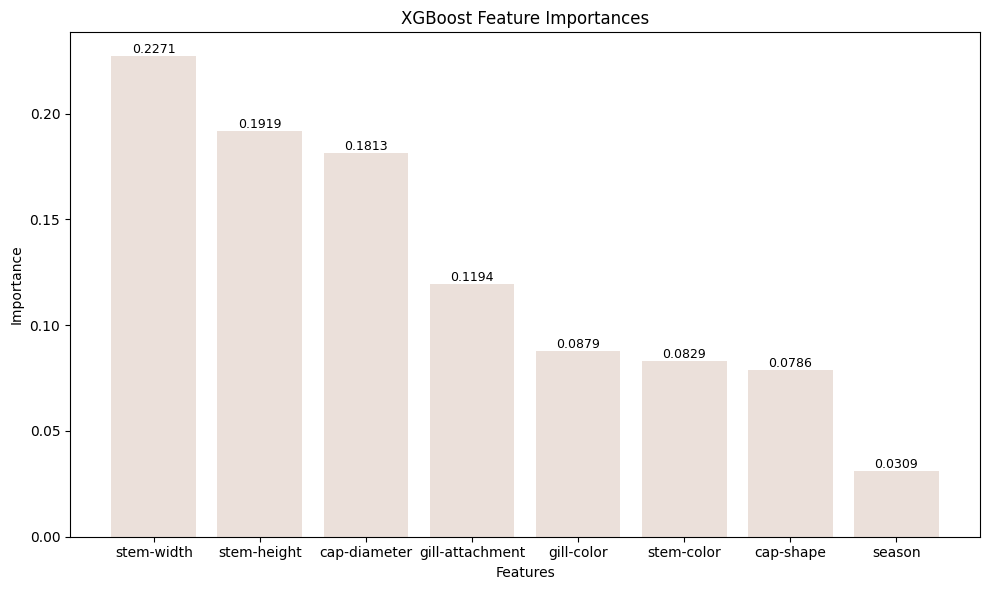

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb
import numpy as np

# Extract feature importances
importance_dict = bst.get_score()
features = list(importance_dict.keys())
importances = list(importance_dict.values())

# Normalize importances
total_importance = sum(importances)
normalized_importances = [imp / total_importance for imp in importances]

# Sort features by normalized importance
sorted_indices = np.argsort(normalized_importances)[::-1]
sorted_features = [features[i] for i in sorted_indices]
sorted_importances = [normalized_importances[i] for i in sorted_indices]

# Plot normalized feature importances
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_features, sorted_importances, color="#EBE0DA")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('XGBoost Feature Importances')

# Annotate the bars with values
for bar, importance in zip(bars, sorted_importances):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{importance:.4f}",
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

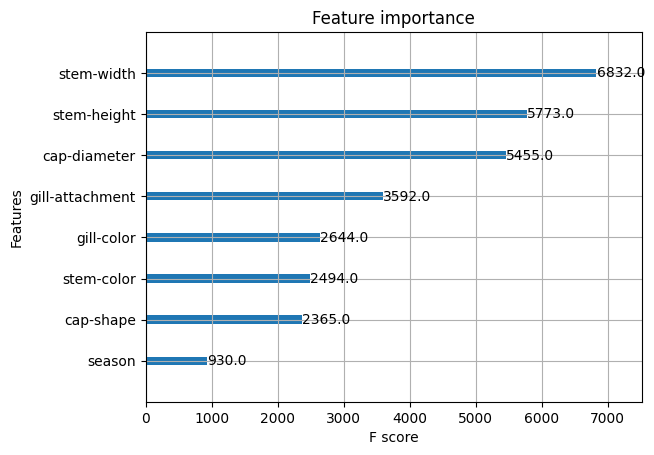

<Figure size 1000x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# Plot feature importance
xgb.plot_importance(bst)
plt.figure(figsize=(10, 6))

plt.show()

xgboost Accuracy: 0.9904691403719811


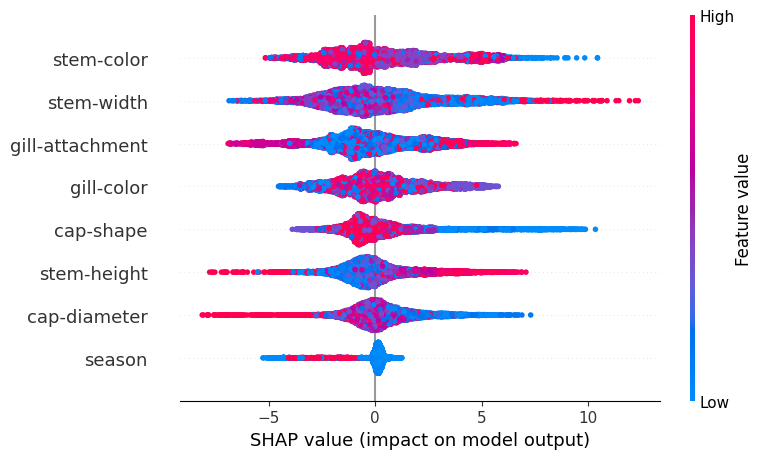

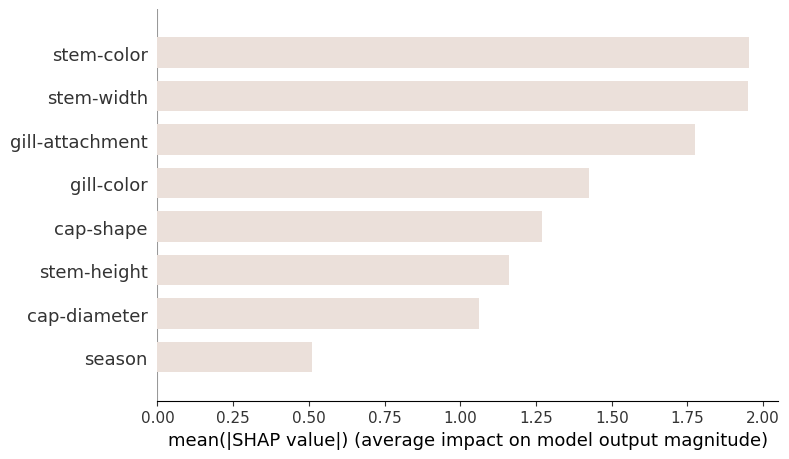

In [ ]:
import shap
import matplotlib.pyplot as plt

# SHAP Analysis
explainer = shap.TreeExplainer(bst)  # Create SHAP explainer
shap_values = explainer.shap_values(X_test)  # Calculate SHAP values for the test set

# Summary Plot
shap.summary_plot(shap_values, X_test)

# Feature Importance Plot
shap.summary_plot(shap_values, X_test, plot_type="bar", color="#EBE0DA")

**Deep learning**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5686 - loss: 1.0043 - val_accuracy: 0.6099 - val_loss: 0.6589
Epoch 2/200
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6101 - loss: 0.6716 - val_accuracy: 0.6202 - val_loss: 0.6451
Epoch 3/200
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6127 - loss: 0.6437 - val_accuracy: 0.6323 - val_loss: 0.6285
Epoch 4/200
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6277 - loss: 0.6258 - val_accuracy: 0.6485 - val_loss: 0.6159
Epoch 5/200
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6317 - loss: 0.6147 - val_accuracy: 0.5888 - val_loss: 0.6473
Epoch 6/200
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6121 - loss: 0.6252 - val_accuracy: 0.5599 - val_loss: 0.6601
Epoch 7/200
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5834 - loss: 0.6265 - val_accuracy: 0.5739 - val_loss: 0.6166
Epoch 8/200
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6157 - loss: 0

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9284 - loss: 0.1829 - val_accuracy: 0.9255 - val_loss: 0.1960
Epoch 2/50
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9287 - loss: 0.1810 - val_accuracy: 0.9264 - val_loss: 0.1930
Epoch 3/50
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9282 - loss: 0.1810 - val_accuracy: 0.9417 - val_loss: 0.1619
Epoch 4/50
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9340 - loss: 0.1710 - val_accuracy: 0.9304 - val_loss: 0.1813
Epoch 5/50
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9291 - loss: 0.1765 - val_accuracy: 0.9359 - val_loss: 0.1695
Epoch 6/50
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9309 - loss: 0.1732 - val_accuracy: 0.9257 - val_loss: 0.1867
Epoch 7/50
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9318 - loss: 0.1725 - val_accuracy: 0.9331 - val_loss: 0.1774
Epoch 8/50
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9327 - loss: 0.1726 - 

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9454 - loss: 0.1438 - val_accuracy: 0.9419 - val_loss: 0.1539
Epoch 2/50
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9335 - loss: 0.1602 - val_accuracy: 0.9467 - val_loss: 0.1491
Epoch 3/50
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9425 - loss: 0.1493 - val_accuracy: 0.9556 - val_loss: 0.1275
Epoch 4/50
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9492 - loss: 0.1318 - val_accuracy: 0.9246 - val_loss: 0.1970
Epoch 5/50
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9449 - loss: 0.1435 - val_accuracy: 0.9304 - val_loss: 0.1744
Epoch 6/50
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9415 - loss: 0.1481 - val_accuracy: 0.9389 - val_loss: 0.1621
Epoch 7/50
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9476 - loss: 0.1340 - val_accuracy: 0.9447 - val_loss: 0.1514
Epoch 8/50
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9426 - loss: 0.1454 - 

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9570 - loss: 0.1162
Test Accuracy: 0.9573424458503723


Standard MLP Accuracy: 0.9573424458503723

# **H2O**

In [ ]:
! apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
0 upgraded, 12 newly installed, 0 to remove and 49 not upgraded.
Need to get 3,722 kB of archives.
After this operation, 12.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 default-jre-headless amd64 2:1.11-72build2 [3,042 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:3 http://archive.ubuntu.com

**H2O**

In [ ]:
! pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.6-py2.py3-none-any.whl size=265859786 sha256=d7ef9530af3614481f8e5f3f1d361d71e24f7f358f2d04b9da047cfbfc763ffd
  Stored in directory: /root/.cache/pip/wheels/0c/95/eb/b449c73f478dbc4557b80170cf7f2aa6db15862877e9a63536
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
# H2O 초기화
h2o.init()

# 데이터 준비
h2o_df = h2o.H2OFrame(df)
h2o_df['class'] = h2o_df['class'].asfactor()

# 특징 및 타겟 설정
features = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
            'stem-height', 'stem-width', 'stem-color', 'season']
target = 'class'

# 데이터 분할
train, test = h2o_df.split_frame(ratios=[0.8], seed=42)

# AutoML 모델 생성 및 학습
aml = H2OAutoML(max_models=20, max_runtime_secs=600, seed=42)
aml.train(x=features, y=target, training_frame=train)

# 모델 성능 평가
performance = aml.leader.model_performance(test_data=test)

# Access the leaderboard
leaderboard = aml.leaderboard

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,26 mins 11 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_unknownUser_w1zcyq
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.080 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
print(performance)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.00776294160336224
RMSE: 0.08810755701619606
LogLoss: 0.027865999166481897
Mean Per-Class Error: 0.010278686977166072
AUC: 0.9995243625085383
AUCPR: 0.9996131653258162
Gini: 0.9990487250170765

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5206053459159845
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      4805  59    0.0121   (59.0/4864.0)
1      50    5883  0.0084   (50.0/5933.0)
Total  4855  5942  0.0101   (109.0/10797.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.520605     0.990821  200
max f2                       0.165457     0.993822  271
max f0point5                 0.770921     0.99311   138
max accuracy                 0.524345     0.989905  199
max precision                0.999948     1         0
max recall

In [ ]:
leaderboard_df = aml.leaderboard.as_data_frame()
print("Total models in leaderboard:", len(leaderboard_df))

Total models in leaderboard: 7


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
topmodel = [h2o.get_model(leaderboard.as_data_frame()['model_id'][idx]) for idx in range(len(leaderboard_df))]

# Print details about the 199th model
for idx, model in enumerate(topmodel):
    print("Model ID:", model.model_id)
    print("Model Type:", model.algo)
    print("Model Parameters:")
    perf = model.model_performance(test_data=test)
    print("Performance Metrics:", perf)

    for param, value in model.params.items():
        print(f"{param}: {value['actual']}")
    print()

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow a

Model ID: GBM_1_AutoML_2_20241202_113320
Model Type: gbm
Model Parameters:
Performance Metrics: ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.00776294160336224
RMSE: 0.08810755701619606
LogLoss: 0.027865999166481897
Mean Per-Class Error: 0.010278686977166072
AUC: 0.9995243625085383
AUCPR: 0.9996131653258162
Gini: 0.9990487250170765

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5206053459159845
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      4805  59    0.0121   (59.0/4864.0)
1      50    5883  0.0084   (50.0/5933.0)
Total  4855  5942  0.0101   (109.0/10797.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.520605     0.990821  200
max f2                       0.165457     0.993822  271
max f0point5                 0.770921     0.99311   138
max accuracy            

In [ ]:
# H2O 클러스터 종료
h2o.cluster().shutdown()

H2O session _sid_a392 closed.


**t-SNE visualization**

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Prepare features and labels
features = df.drop('class', axis=1)
labels = df['class']

# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(features)

# Apply t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features)

NameError: name 'df' is not defined

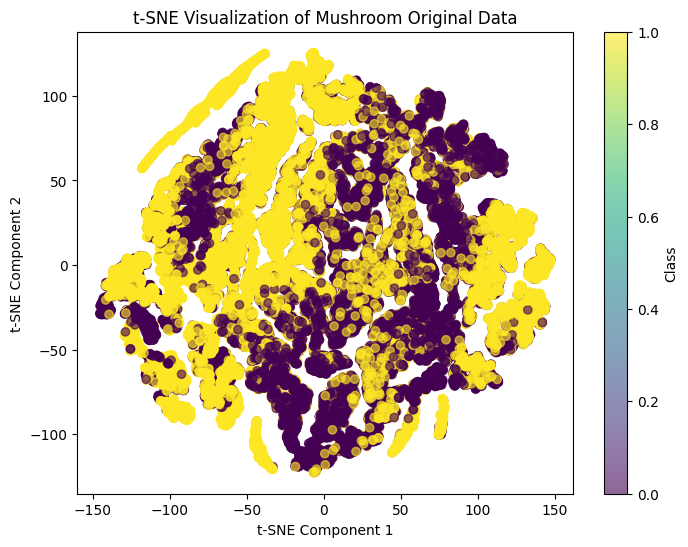

In [ ]:
# Plot the results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title('t-SNE Visualization of Mushroom Original Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, label='Class')
plt.show()

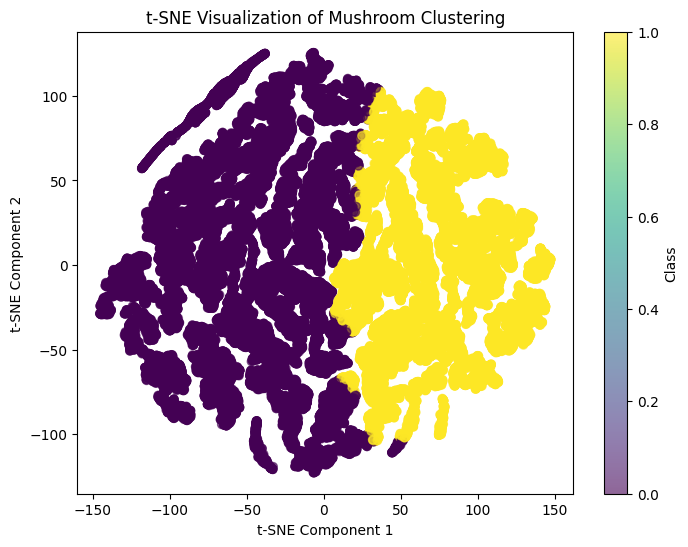

In [ ]:
# Plot the results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('t-SNE Visualization of Mushroom Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, label='Class')
plt.show()

Silhouette Score: 0.14324906421096753


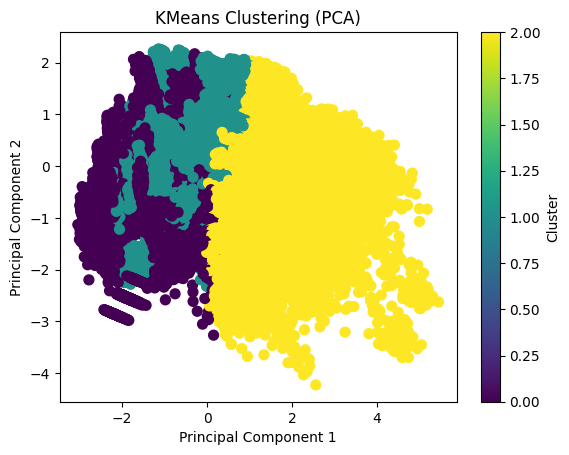

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("mushroom_cleaned.csv")

# Drop the 'class' column
data = df.drop(columns=["class"])

# Encode categorical features
le = LabelEncoder()
for column in data.select_dtypes(include=["object"]).columns:
    data[column] = le.fit_transform(data[column])

# Scale the features for better clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the dataset
df["Cluster"] = clusters

# Evaluate clustering with silhouette score
silhouette_avg = silhouette_score(data_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Visualize clusters using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap="viridis", s=50)
plt.title("KMeans Clustering (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()


In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Encode the true labels (edible/poisonous)
true_labels = le.fit_transform(df["class"])  # Encode 'class' column

# Calculate metrics to compare clusters with true labels
ari = adjusted_rand_score(true_labels, clusters)
nmi = normalized_mutual_info_score(true_labels, clusters)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Normalized Mutual Information (NMI): {nmi}")

Silhouette Score: 0.14324906421096753
Adjusted Rand Index (ARI): 0.014693770636364296
Normalized Mutual Information (NMI): 0.014536987048463349


Silhouette Score: 0.16697595841941235


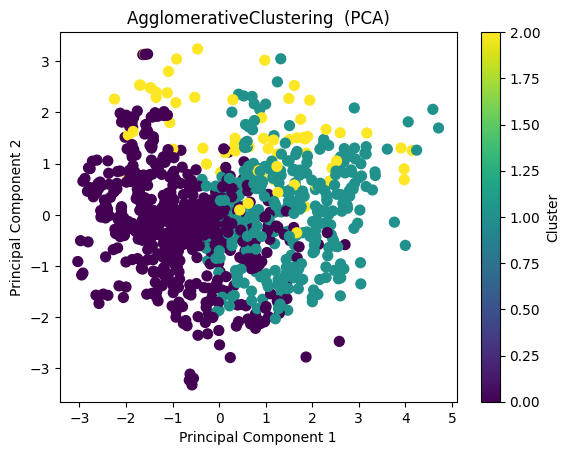

In [ ]:
import gc
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("mushroom_cleaned.csv")

# Sample if dataset is too large
df = df.sample(n=1000, random_state=42)

# Drop the 'class' column (we'll cluster without labels)
data = df.drop(columns=["class"])

# Encode categorical features
le = LabelEncoder()
for column in data.select_dtypes(include=["object"]).columns:
    data[column] = le.fit_transform(data[column])

# Scale the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform clustering
clustering = AgglomerativeClustering(n_clusters=3, linkage="ward")
cluster_labels = clustering.fit_predict(data_scaled)

# Add cluster labels to the original dataset
df["Cluster"] = cluster_labels

# Evaluate clusters with silhouette score
silhouette_avg = silhouette_score(data_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Visualize clusters using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap="viridis", s=50)
plt.title("AgglomerativeClustering  (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()


Silhouette Score: 0.16697595841941235
Adjusted Rand Index (ARI): 0.04173505561048274
Normalized Mutual Information (NMI): 0.032487349049258776


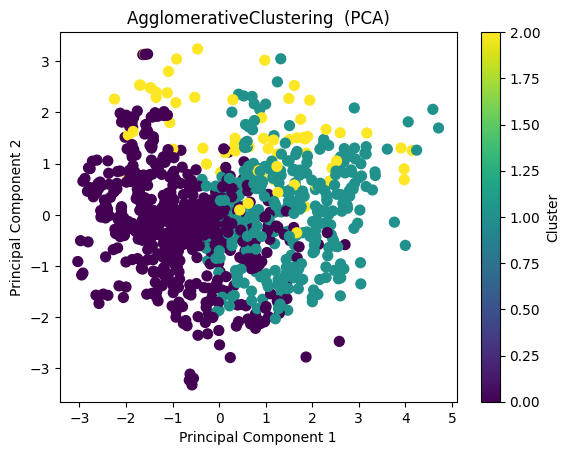

In [ ]:
import gc
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("mushroom_cleaned.csv")

# Sample if dataset is too large
df = df.sample(n=1000, random_state=42)

# Save the true labels for evaluation (class column as ground truth)
true_labels = df["class"]

# Drop the 'class' column (we'll cluster without labels)
data = df.drop(columns=["class"])

# Encode categorical features
le = LabelEncoder()
for column in data.select_dtypes(include=["object"]).columns:
    data[column] = le.fit_transform(data[column])

# Scale the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform clustering
clustering = AgglomerativeClustering(n_clusters=3, linkage="ward")
cluster_labels = clustering.fit_predict(data_scaled)

# Add cluster labels to the original dataset
df["Cluster"] = cluster_labels

# Evaluate clusters with silhouette score
silhouette_avg = silhouette_score(data_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Evaluate clustering performance with ARI and NMI
ari = adjusted_rand_score(true_labels, cluster_labels)
nmi = normalized_mutual_info_score(true_labels, cluster_labels)

print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Visualize clusters using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap="viridis", s=50)
plt.title("AgglomerativeClustering  (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()
